In [16]:
#!pip install fbprophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [5]:
df = pd.read_csv('Traffic data.csv')

In [6]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [7]:
# Checking null value
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [11]:
#Removing ID column

df = df.drop('ID',axis = 1)

In [12]:
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [14]:
#Convert object into datetime

df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  18288 non-null  datetime64[ns]
 1   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 285.9 KB


# EDA

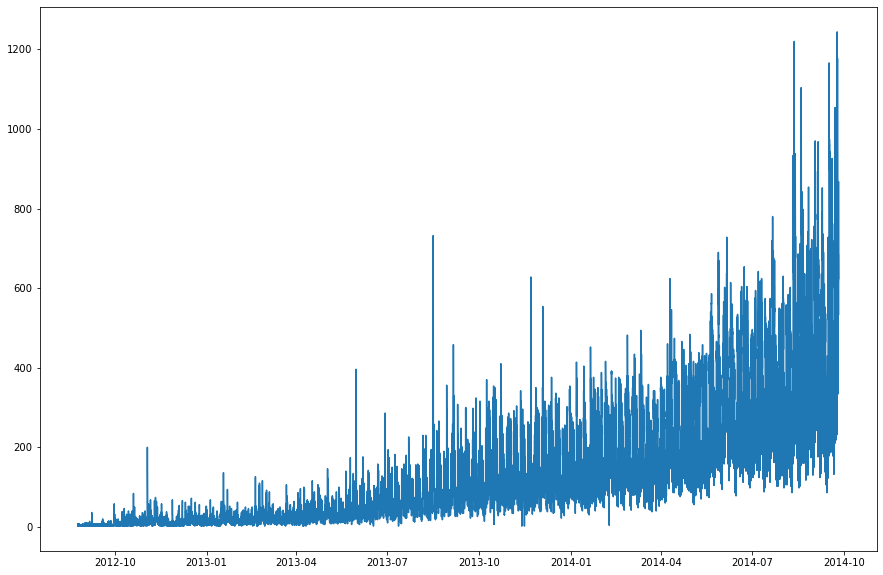

In [17]:
plt.figure(figsize = (15, 10))
plt.plot(df['Datetime'], df['Count'])
plt.show()

In [19]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [20]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


In [21]:
size = 70
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [22]:
train.tail()

,y,ds
Datetime,,
2014-07-13,4922,2014-07-13
2014-07-14,8530,2014-07-14
2014-07-15,8302,2014-07-15
2014-07-16,7956,2014-07-16
2014-07-17,7734,2014-07-17


In [23]:
test.head()

,y,ds
Datetime,,
2014-07-18,8466,2014-07-18
2014-07-19,7934,2014-07-19
2014-07-20,8184,2014-07-20
2014-07-21,11946,2014-07-21
2014-07-22,11012,2014-07-22


In [25]:
#Model Training

model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = model.make_future_dataframe(periods=70)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [27]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-503.866905,-1706.046175,105.925376,-503.866905,-503.866905,-325.793442,-325.793442,-325.793442,-836.697332,-836.697332,-836.697332,510.903891,510.903891,510.903891,0.0,0.0,0.0,-829.660347
1,2012-08-26,-496.699095,-1838.059483,-7.256872,-496.699095,-496.699095,-447.106656,-447.106656,-447.106656,-957.226864,-957.226864,-957.226864,510.120208,510.120208,510.120208,0.0,0.0,0.0,-943.805750
2,2012-08-27,-489.531284,-514.990451,1368.527779,-489.531284,-489.531284,913.428971,913.428971,913.428971,404.927008,404.927008,404.927008,508.501963,508.501963,508.501963,0.0,0.0,0.0,423.897687
3,2012-08-28,-482.363473,-540.800062,1421.381147,-482.363473,-482.363473,929.576056,929.576056,929.576056,423.287553,423.287553,423.287553,506.288503,506.288503,506.288503,0.0,0.0,0.0,447.212582
4,2012-08-29,-475.195663,-452.037227,1322.387146,-475.195663,-475.195663,896.174574,896.174574,896.174574,392.477309,392.477309,392.477309,503.697265,503.697265,503.697265,0.0,0.0,0.0,420.978911


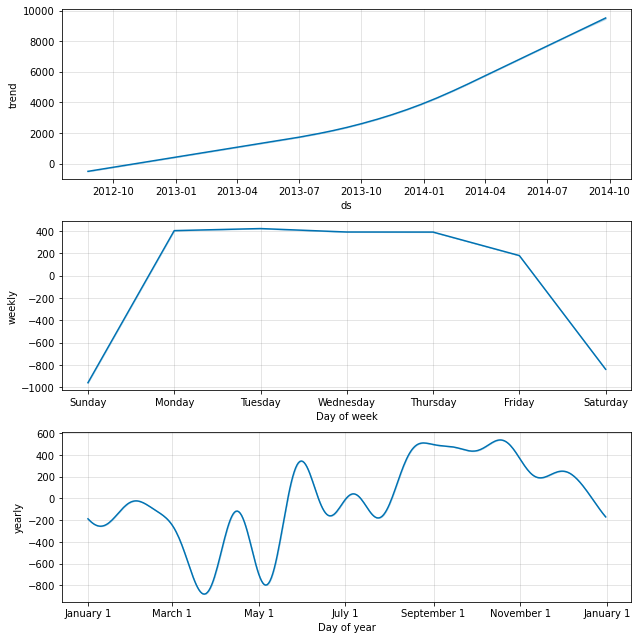

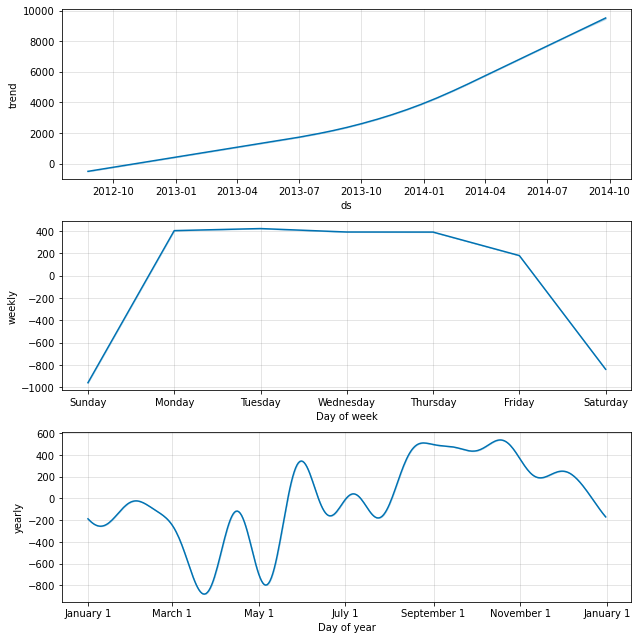

In [30]:
model.plot_components(forecast)

In [31]:
pred = forecast.iloc[-70:, :]
len(pred)

70

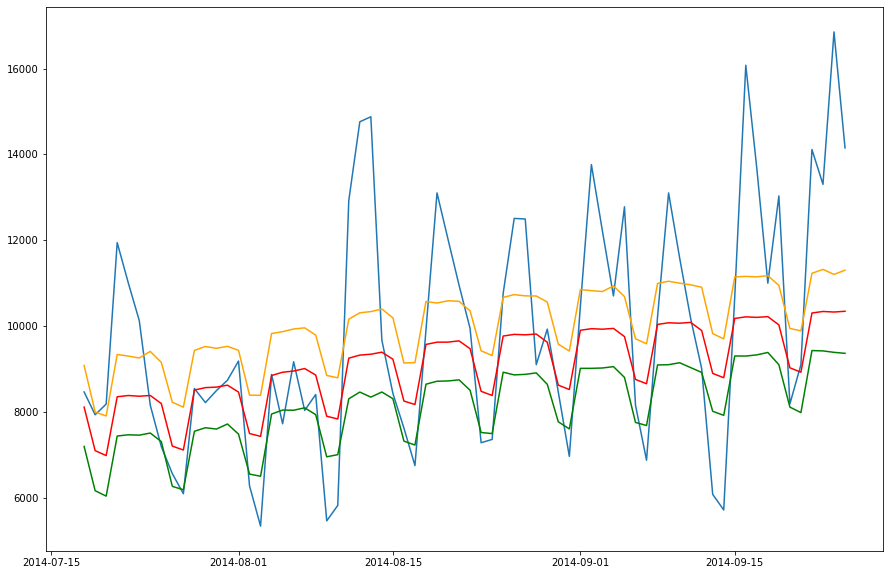

In [33]:
plt.figure(figsize=(15,10))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

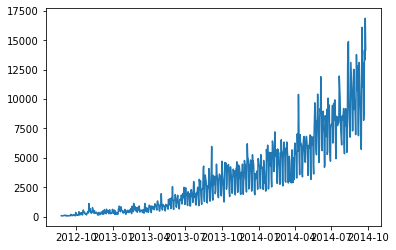

In [34]:
#input data

plt.plot(df['ds'], df['y'])
plt.show()

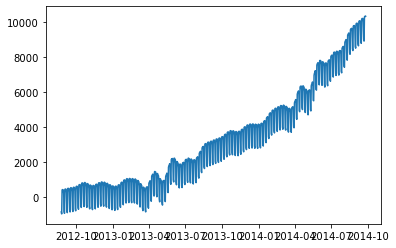

In [35]:
# forecast data

plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [36]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-677.620298,-2299.465493,58.811356,-677.620298,-677.620298,-421.092076,-421.092076,-421.092076,-995.304934,-995.304934,-995.304934,574.212858,574.212858,574.212858,0.0,0.0,0.0,-1098.712374
1,2012-08-26,-669.558106,-2380.912174,-35.387298,-669.558106,-669.558106,-579.408948,-579.408948,-579.408948,-1144.361400,-1144.361400,-1144.361400,564.952451,564.952451,564.952451,0.0,0.0,0.0,-1248.967054
2,2012-08-27,-661.495913,-901.394031,1529.487410,-661.495913,-661.495913,1010.443950,1010.443950,1010.443950,457.606643,457.606643,457.606643,552.837306,552.837306,552.837306,0.0,0.0,0.0,348.948036
3,2012-08-28,-653.433721,-748.717078,1624.470086,-653.433721,-653.433721,1147.106582,1147.106582,1147.106582,608.425344,608.425344,608.425344,538.681238,538.681238,538.681238,0.0,0.0,0.0,493.672861
4,2012-08-29,-645.371528,-762.047617,1625.853642,-645.371528,-645.371528,1080.300735,1080.300735,1080.300735,556.984006,556.984006,556.984006,523.316728,523.316728,523.316728,0.0,0.0,0.0,434.929206


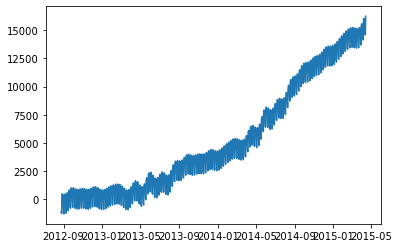

In [37]:
#forecast data

plt.plot(forecast['ds'], forecast['yhat'])
plt.show()